## 4. Gradient Descent

We use the **Gradient Descent** algorithm — one of the most important algorithms in deep learning.

Gradient Descent adjusts the parameters $w$ and $b$ to minimize the loss function (log-loss here).

But first, we need to know: How does the Log-Loss change when we slightly change $w$ or $b$? That way we can adjust them in the right direction.

Answer: we calculate the **gradient** (the derivative).

> Gradient descent is like skiing down a hill: you go in the direction that reduces the friction (the error) the most, to maximize your speed and win the competition.

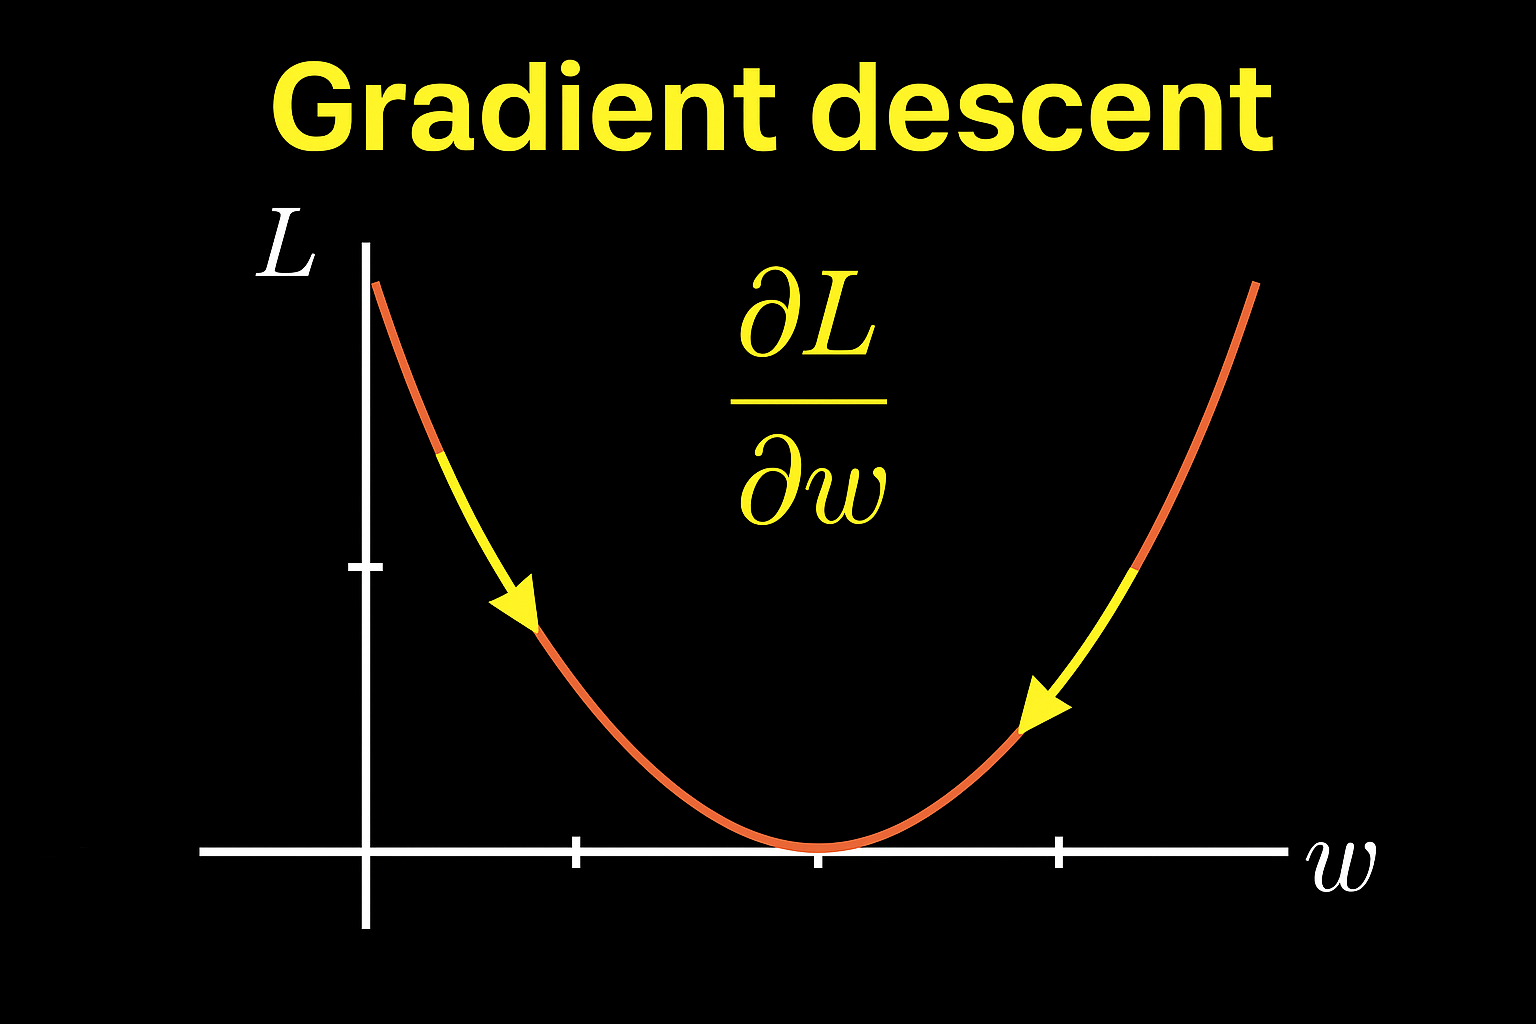

In [1]:
from IPython.display import Image, display

display(Image("/Users/pierre/Desktop/GitHub/Deep-Learning-from-Scratch/assets/photos_git/gradient.png", width=400, height=300))

**Important :** The derivative of a function indicates how that function changes. If, when $w$ increases, the derivative is negative, it means the function is decreasing and we need to increase $w$ in order to minimize the cost function. Conversely, if the derivative is positive, it means the function is increasing, and we need to decrease $w$ to minimize the cost function.


We will now calculate the derivative of the loss function with respect to $w$ and $b$.

$$
\frac{\partial L}{\partial W},  \frac{\partial L}{\partial b}
$$

where $L$ is the cost function, $W = (w_1, w_2)$ is the weight vector, and $b$ is the bias.

When we computed these derivatives, we can use them to update the parameters $W$ and $b$ using the following formulas:

$$
W = W - \alpha \cdot \frac{\partial L}{\partial W}
$$

$$
b = b - \alpha \cdot \frac{\partial L}{\partial b}
$$

where $\alpha$ is the learning rate.


We can clearly see here that the update of the parameters $w$ and $b$ depends on the derivative of the cost function with respect to $w$ and $b$. Refer to the explanation above if needed.


### You completed a deep learning algorithm

Ola ola... wait.. We've finished the neuron architecture!

Here's what we've just covered:
1) A mathematical model that processes the input data: the linear binary classification model
2) An activation function: the sigmoid function
3) A performance measure (or cost function): the log-loss
4) An optimization of this performance: gradient descent


BUT you haven't yet understood how this architecture works. But don't worry, it's normal. We're going to go through it together.

To understand how this architecture works, we need to implement all these functions in a learning loop to train the model. Of course because now we have a new set of parameters: the new weights $w$ and the new bias $b$ !!

## **Wait wait... really ?**

Yeah.. the usual deep learning book would stop here and tell you the gradients. It would say: using these gradients find by... who ?! The author ? The teacher ? The internet ?!

You really want to feel like someone who knows what he's doing, right ? You don't want to be a parrot that repeats what others say.

We are going to calculate the gradients ourselves.

It's math, it's not fun, but it's necessary. So stop complaining and act for your self-taught learning journey.


## 5. Now it is time for you to listen carefully.

To do this, we will start from the loss function and calculate the gradients with respect to $w$ and $b$. Specifically, we need to calculate these 3 gradients:
1) The gradient of the loss function with respect to $w_1$
2) The gradient of the loss function with respect to $w_2$
3) The gradient of the loss function with respect to $b$

In mathematical terms, we are going to calculate the following gradients:
$$
\frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \frac{\partial L}{\partial b}
$$


To do this, we will use the chain rule. The chain rule is a differentiation rule that allows us to calculate the derivative of a composed function. In simple terms, if we have a function $f(g(x))$, we can calculate the derivative of $f$ with respect to $x$ by multiplying the derivative of $f$ with respect to $g$ by the derivative of $g$ with respect to $x$. In simpler terms, it allows us to break down complex derivatives into simpler parts, which is exactly what we need to do here.

We will apply the chain rule to our loss function. Therefore, we will calculate the following gradients:

$$
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1}
$$
$$
\frac{\partial L}{\partial w_2} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_2}
$$
$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial b}
$$

> see how each gradient is a product of 3 simpler gradients ?

## $\frac{\partial L}{\partial w_1}$ Computation

Let's go for the first one. We want to compute the following:

$$
\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1}
$$

It seems complicated, but it is not. We know the expressions that link each function together. Remember that we have a linear function that processes the input data, an activation function, and a loss function.

- The linear function is $z = w_1 \cdot x_1 + w_2 \cdot x_2 + b$
- The activation function is $a(z) = \frac{1}{1 + e^{-z}}$
- The loss function is $\mathcal{L}(W, b) = \sum_{i=1}^{N} \left( y_i \cdot \log(a(z_i)) + (1 - y_i) \cdot \log(1 - a(z_i)) \right)$


Let's calculate the small gradients one by one.
### 1) $\frac{\partial L}{\partial a}$
We have the following loss function:
$$
\mathcal{L}(W, b) = \sum_{i=1}^{N} \left( y_i \cdot \log(a(z_i)) + (1 - y_i) \cdot \log(1 - a(z_i)) \right)
$$
We can see that the loss function is composed of two parts: the first part is $y_i \cdot \log(a(z_i))$ and the second part is $(1 - y_i) \cdot \log(1 - a(z_i))$. The derivatives of rhese ineer parts are what we need to calculate.
We can calculate them using the logarithm properties. The derivative of the logarithm function is:
$$
\frac{\partial L}{\partial a} = \frac{\partial L}{\partial a(z)} = \frac{y_i}{a(z)} - \frac{1 - y_i}{1 - a(z)}
$$

> yeah, the derivative function of the log function is the function $\frac{1}{x}$

### 2) $\frac{\partial a}{\partial z}$
The sigmoid activation function is defined as:
$$
a(z) = \frac{1}{1 + e^{-z}}
$$
Where $a(z)$ is the activation function, and $z$ is the output of the neuron.
We can compute the gradient of the activation function with respect to its input as:

> remember your damn derivative rules ($\frac{\partial}{\partial z} \frac{1}{u(z)} = \frac{-1}{u^2} \cdot \frac{\partial u}{\partial z}$), moreover, there's a trick later.

$$
\begin{aligned}
\frac{\partial a(z)}{\partial z} &= \frac{\partial}{\partial z} \left(\frac{1}{1 + e^{-z}}\right)\\
&= \frac{-1}{(1 + e^{-z})^2} \cdot \frac{\partial}{\partial z} (1 + e^{-z})\\
&= \frac{-1}{(1 + e^{-z})^2} \cdot (-e^{-z})\\
&= \frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}}
\end{aligned}
$$
> And now you can see that the first term is the activation function

$$
= a(z) \cdot \frac{1}{1 + e^{-z}}\\
$$
> the trick is to bring up the activation on the second term by doing this simple trick: $e^{-z} = e^{-z} + 1 - 1$ 

$$
\begin{aligned}
&= a(z) \cdot \frac{e^{-z} + 1 - 1}{1 + e^{-z}}\\
&= a(z) \cdot (\frac{1 + e^{-z}}{1 + e^{-z}} - \frac{1}{1 + e^{-z}})
\end{aligned}
$$
> the first term in the parentheses simplifies to 1, and we can see the activation for the second term

$$
= a(z) \cdot (1 - a(z))\\
$$

### 3) $\frac{\partial z}{\partial w_1}$
We have the following linear function:
$$
z = w_1 \cdot x_1 + w_2 \cdot x_2 + b
$$
We can calculate the derivative of the linear function with respect to $w_1$ as follows:
$$
\frac{\partial z}{\partial w_1} = x_1
$$
This is the derivative of the linear function with respect to $w_1$.

### We can now begin the development of $\frac{\partial L}{\partial w_1}$ :

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \omega_1} & =\frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w_1} \\
& =\left(-\frac{1}{m} \sum_i y_i \frac{1}{a_i}+\left(1-y_i\right) \times-\frac{1}{1-a_i}\right) \times e^{-z}\left(1+e^{-z}\right)^{-2} \times x_1 \\
& =\frac{-x_1}{m} \sum_i\left(\frac{y_i}{a_i}+\frac{\left(y_i-1\right)}{1-a_i}\right) \frac{e^{-z}}{\left(1+e^{-z}\right)^2} \\
& =\frac{-x_1}{m} \sum_i\left(\frac{y_i-y_i a_i+a_i y_i-a_i}{a_i\left(1-a_i\right)}\right) a(z) \frac{\left(e^{-z}+1\right)-1}{1+e^{-z}} \\
& =\frac{-x_1}{m} \sum_i\left(\frac{\left(y_i-a_i\right)}{a_i\left(1-a_i\right)}\right) a(z) \times(1-a(z)) \\
& =\frac{-x_1}{m} \sum_i\left(\frac{\left(y_i-a_i\right)}{a_i\left(1-a_i\right)} \times a_{i j}\left(1-a_i\right)\right) \\
& =-\frac{x_1}{m} \sum_i^m\left(y_i-a_i\right) \\
\end{aligned}
$$
Thus, we obtain the gradient of the cost function with respect to $w_1$:
$$
\left[\frac{\partial \mathcal{L}}{\partial w_1}=-\frac{x_1}{m} \sum_i\left(y_i-a_{i}\right)\right]
$$

## $\frac{\partial L}{\partial w_2}$ Computation

Similarly, we can calculate the gradient of the loss function with respect to $w_2$:
$$
\left[\frac{\partial \mathcal{L}}{\partial w_2}=-\frac{x_2}{m} \sum_i\left(y_i-a_{i}\right)\right]

$$



## $\frac{\partial L}{\partial b}$ Computation

For the gradient of the loss function with respect to $b$, we can observe that:
$$
\frac{\partial z}{\partial b} = 1
$$

By following the same approach as for the other gradients, we obtain the gradient of the cost function with respect to $b$ as:
$$
\left[\frac{\partial \mathcal{L}}{\partial b}=-\frac{1}{m} \sum_i\left(y_i-a_{i}\right)\right]
$$

And there you have it, we now have all the gradients of the loss function with respect to $w$ and $b$. We can now use these gradients to update the parameters $w$ and $b$ during the learning loop.

We will update the parameters $w$ and $b$ using the following formulas:
$$
w_1 = w_1 - \alpha \cdot \frac{\partial L}{\partial w_1}
$$
$$
w_2 = w_2 - \alpha \cdot \frac{\partial L}{\partial w_2}
$$
$$
b = b - \alpha \cdot \frac{\partial L}{\partial b}
$$


That's it!! Phew, this was really the hardest part to understand.

You don't realize what you've just done, but let me tell you that 90% of the students in my engineering school don't know how to do this.

Now, all that's left is to code everything into a learning loop in order to train this neuron. 

You'll see how the neuron learns by itself using what we just covered.


**Head over to the practice_00 notebook to code this very same neuron capable of classifying toxic and non-toxic plants!**